### Load in dataset properties

In [2]:
import openml
import numpy as np
import pandas as pd

###################### obtain the benchmark suites ######################
set_CC18 = openml.study.get_suite('OpenML-CC18')
set_100 = openml.study.get_suite('OpenML100')

dimen_CC18 = []
dimen_100 = []

for task_id in set_CC18.tasks:  # iterate over all tasks
    try:
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        features_CC18, targets_CC18 = task.get_X_and_y()  # get the data
        dimen_CC18.append(np.shape(features_CC18))
    except:
        print('Error in OpenML CC-18 dataset ' + str(task_id))

for task_id in set_100.tasks:  # iterate over all tasks
    try:
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        features_100, targets_100 = task.get_X_and_y()  # get the data
        dimen_100.append(np.shape(features_100))
    except:
        print('Error in OpenML 100 dataset ' + str(task_id))
        
########################## read in accuracies ###########################
acc_SPORF_CC18 = open('SPORF_accuracies_CC-18.txt','r')

SPORF_taskID_CC18 = []
SPORF_name_CC18 = []
SPORF_accuracy_CC18 = []
SPORF_time_CC18 = []
    
for line in acc_SPORF_CC18:
    fields = line.split(',')
    SPORF_taskID_CC18.append(fields[0])
    SPORF_name_CC18.append(fields[1])
    SPORF_accuracy_CC18.append(float(fields[2]))
    SPORF_time_CC18.append(fields[3])

# print(np.shape(SPORF_accuracy_CC18)) <- WORKS!

acc_SPORF_100 = open('SPORF_accuracies_100.txt','r')

SPORF_taskID_100 = []
SPORF_name_100 = []
SPORF_accuracy_100 = []
SPORF_time_100 = []

for line in acc_SPORF_100:
    fields = line.split(',')
    SPORF_taskID_100.append(fields[0])
    SPORF_name_100.append(fields[1])
    SPORF_accuracy_100.append(float(fields[2]))
    SPORF_time_100.append(fields[3])

# print(np.shape(SPORF_accuracy_100)) <- WORKS!

acc_skRF_CC18 = open('sklearnRF_accuracies_CC-18.txt','r')

skRF_taskID_CC18 = []
skRF_name_CC18 = []
skRF_accuracy_CC18 = []
skRF_time_CC18 = []

for line in acc_skRF_CC18:
    fields = line.split(',')
    skRF_taskID_CC18.append(fields[0])
    skRF_name_CC18.append(fields[1])
    skRF_accuracy_CC18.append(float(fields[2]))
    skRF_time_CC18.append(fields[3])

# print(np.shape(skRF_accuracy_CC18)) <- WORKS!

acc_skRF_100 = open('sklearnRF_accuracies_100.txt','r')

skRF_taskID_100 = []
skRF_name_100 = []
skRF_accuracy_100 = []
skRF_time_100 = []

for line in acc_skRF_100:
    fields = line.split(',')
    skRF_taskID_100.append(fields[0])
    skRF_name_100.append(fields[1])
    skRF_accuracy_100.append(float(fields[2]))
    skRF_time_100.append(fields[3])

# print(np.shape(skRF_accuracy_100)) <- WORKS!

Error in OpenML 100 dataset 34536


### Find accuracy differences

In [3]:
acc_diffs_CC18 = []
acc_diffs_100 = []

for i in range(len(SPORF_accuracy_CC18)):
    acc_diffs_CC18.append(SPORF_accuracy_CC18[i]-skRF_accuracy_CC18[i])
    
for i in range(len(SPORF_accuracy_100)):
    acc_diffs_100.append(SPORF_accuracy_100[i]-skRF_accuracy_100[i])
    
print(np.shape(acc_diffs_CC18))
print(np.shape(acc_diffs_100))

# account for error in one OpenML 100 dataset (index 89)
dimen_100 = np.delete(dimen_100,[89],axis=0)

(68,)
(55,)


### Standardize accuracies

In [11]:
from sklearn.preprocessing import StandardScaler

# z = (x - u) / s

stand_acc_diffs_CC18 = []

for i in range(len(acc_diffs_CC18)):
    stand_acc_diffs_CC18.append((acc_diffs_CC18[i] - np.mean(acc_diffs_CC18))/np.std(acc_diffs_CC18))

stand_acc_diffs_100 = []

for i in range(len(acc_diffs_100)):
    stand_acc_diffs_100.append((acc_diffs_100[i] - np.mean(acc_diffs_100))/np.std(acc_diffs_100))

print(np.mean(acc_diffs_CC18))
print(np.mean(acc_diffs_100))

0.016633823529411774
0.011969090909090908


### Plot differences

9
8


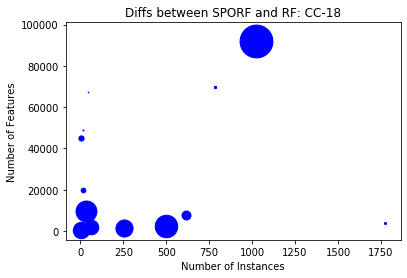

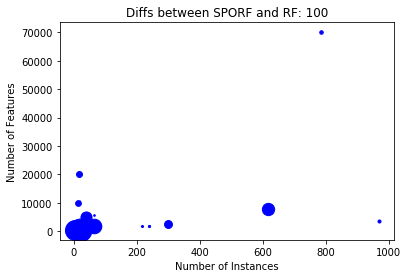

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

red_CC18 = 0
plt.figure()
for i in range(len(acc_diffs_CC18)):
    if acc_diffs_CC18[i] > 0:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'bo',MarkerSize = (stand_acc_diffs_CC18[i])*10)
    else:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'ro',MarkerSize = (stand_acc_diffs_CC18[i])*10)
        red_CC18 += 1
plt.xlabel('Number of Instances')
plt.ylabel('Number of Features')
plt.title('Diffs between SPORF and RF: CC-18')
        
print(red_CC18)
        
red_100 = 0
plt.figure()
for i in range(len(acc_diffs_100)):
    if acc_diffs_100[i] > 0:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'bo',MarkerSize = (stand_acc_diffs_100[i])*10)
    else:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'ro',MarkerSize = (stand_acc_diffs_100[i])*10)
        red_100 += 1
plt.xlabel('Number of Instances')
plt.ylabel('Number of Features')
plt.title('Diffs between SPORF and RF: 100')
        
print(red_100)

In [40]:
print(acc_diffs_CC18)

[0.005900000000000016, 0.03149999999999997, 0.06880000000000008, 0.022500000000000075, 0.03599999999999992, -0.022800000000000042, 0.06300000000000006, 0.012500000000000067, 0.034500000000000086, -0.03199999999999997, 0.020299999999999985, -0.020299999999999985, 0.03600000000000003, 0.006700000000000039, 0.011699999999999933, 0.006900000000000017, 0.02279999999999993, -0.07330000000000003, -0.020100000000000007, -0.0022999999999999687, 0.017100000000000004, 0.0504, 0.0037000000000000366, 0.05149999999999999, 0.04510000000000003, 0.010700000000000043, 0.011400000000000021, 0.02290000000000003, 0.013700000000000045, 0.009600000000000053, 0.013000000000000012, 0.007699999999999929, 0.014699999999999935, 0.0037000000000000366, 0.01969999999999994, 0.0232, 0.007000000000000006, 0.01660000000000006, 0.013299999999999979, 0.00019999999999997797, 0.07100000000000006, -0.10859999999999992, 0.08810000000000007, 0.0026000000000000467, 0.0044000000000000705, 0.013900000000000023, 0.0242, 0.0094999